# Team Project - Static Measures and Initial Uncertainty
## Team 4: Qiqi Wang, Jiachen Wang, Yanli pei, Honggeun Jo

## Objectives
### 1. Test the significance of the difference in the porosity and permeability by facies (declustered)
### 2. Provide an initial assessment of heterogeneity
        Use coefficient of variation, Dykstra- Parsons and Lorenz (by facies)
### 3. Provide an initial uncertainty model (declustered, by-facies) for porosity and permeability 
###     For facies proportions and oil in place
        assume thickness = 20m and oil saturation = 90% 
### 4. Impact of another 10 wells on the uncertainty model

In [220]:
## Import needed package
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import scipy.signal as signal             # kernel for moving window calculation
import random
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

## Set Working Directory
os.chdir("/Users/jiachengwang/Documents/Pyrcz/Gro_Pro")  # set the working directory

# Load Data 
df = pd.read_csv("4_sample_data.csv")                       # well sample data
AI_map = np.loadtxt("4_AI.csv", delimiter = ",")            # AI map
df_subset = pd.DataFrame(df.iloc[:,1:7])

In [221]:
# Split data frame into two part based on their facies
Well_pool = list(range(0,177))               # a sequence or set will work here.                           # set the number to select here.
Ten_wells = pd.DataFrame(df_subset.iloc[random.sample(Well_pool, 10)]) 
df_added = pd.concat([df_subset,Ten_wells])
df_sand=df_added.loc[(df_subset['Facies']==1)]
df_shale=df_added.loc[(df_subset['Facies']==0)]

In [222]:
df_sand.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,166.0,457.048193,219.727843,10.000000,300.000000,480.000000,610.000000,980.000000
Y,166.0,684.548193,233.023228,9.000000,554.000000,739.000000,867.750000,999.000000
Facies,166.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Porosity,166.0,0.127619,0.035015,0.079210,0.092379,0.123238,0.160343,0.186311
Perm,166.0,174.927008,604.859408,0.027218,7.482659,25.595569,106.731887,5689.823420
AI,166.0,2945.394959,688.612493,1759.403262,2381.700915,2841.428046,3473.147935,4516.534318


In [223]:
df_shale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,22.0,630.909091,308.620727,0.000000,460.000000,710.000000,877.500000,950.000000
Y,22.0,296.545455,315.228825,20.000000,51.500000,194.500000,381.500000,979.000000
Facies,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,22.0,0.088887,0.006124,0.078601,0.083740,0.090610,0.092999,0.097991
Perm,22.0,20.568572,38.502368,0.212234,1.329654,3.012062,17.457644,130.115998
AI,22.0,4370.146717,375.516732,3771.938792,4149.918139,4303.718003,4665.307225,5124.532354


In [224]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0; pormax = 0.2;             # range of porosity values
nx = 100; ny = 100; csize = 10.0
cmap = plt.cm.plasma                    # color map

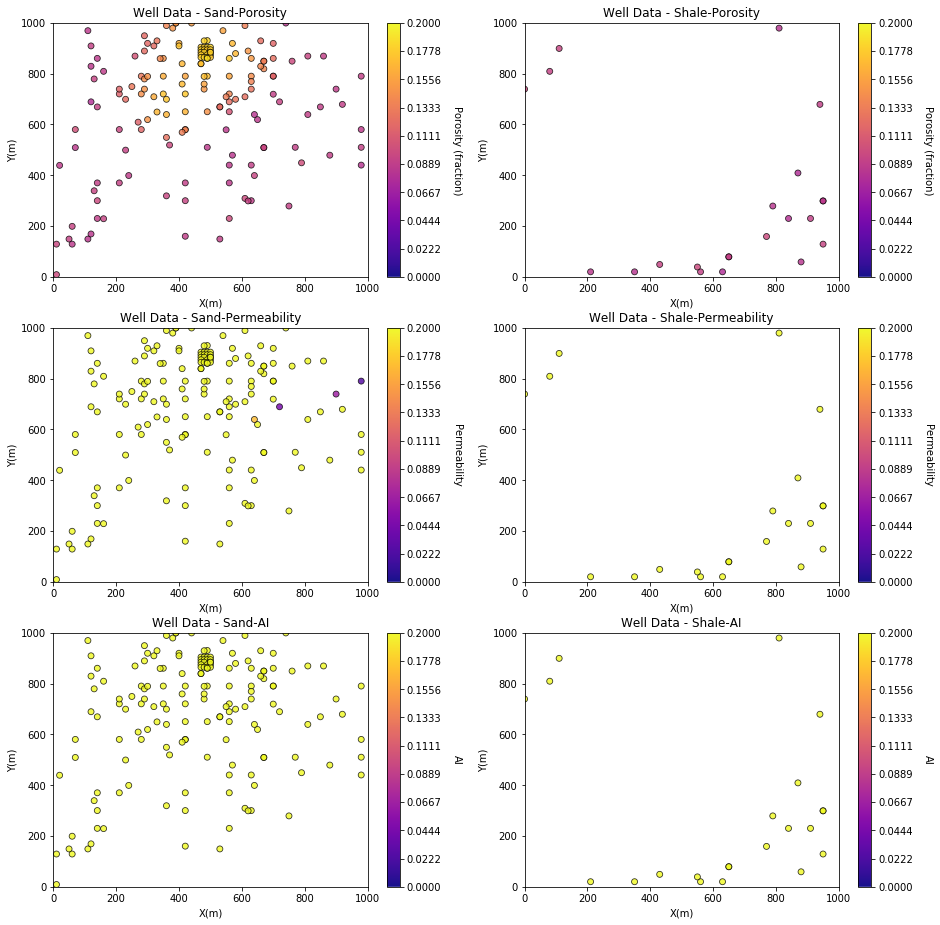

In [225]:
plt.subplot(321)
GSLIB.locmap_st(df_sand,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(322)
GSLIB.locmap_st(df_shale,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(323)
GSLIB.locmap_st(df_sand,'X','Y','Perm',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-Permeability','X(m)','Y(m)','Permeability',cmap)

plt.subplot(324)
GSLIB.locmap_st(df_shale,'X','Y','Perm',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-Permeability','X(m)','Y(m)','Permeability',cmap)

plt.subplot(325)
GSLIB.locmap_st(df_sand,'X','Y','AI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-AI','X(m)','Y(m)','AI',cmap)

plt.subplot(326)
GSLIB.locmap_st(df_shale,'X','Y','AI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-AI','X(m)','Y(m)','AI',cmap)


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.2)
plt.show()

In [232]:
wts_po, cell_sizes_po, dmeans_po = geostats.declus(df_sand,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_po'] = wts_po                            # add weights to the sample data DataFrame

wts_pe, cell_sizes_pe, dmeans_pe = geostats.declus(df_sand,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_pe'] = wts_pe                            # add weights to the sample data DataFrame

wts_ai, cell_sizes_ai, dmeans_ai = geostats.declus(df_sand,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_ai'] = wts_ai                            # add weights to the sample data DataFrame         

wts_fa, cell_sizes_fa, dmeans_fa = geostats.declus(df_subset,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_subset['Wts_fa'] = wts_fa 

def weighted_avg_and_std(values, weights): # function to calculate weighted mean and st. dev., from Eric O Lebigot, stack overflow,
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))




sample_avg_po, sample_stdev_po = weighted_avg_and_std(df_sand['Porosity'],df_sand['Wts_po'])
sample_avg_pe, sample_stdev_pe = weighted_avg_and_std(df_sand['Perm'],df_sand['Wts_pe'])
sample_avg_ai, sample_stdev_ai = weighted_avg_and_std(df_sand['AI'],df_sand['Wts_ai'])

print('Declustered mean_po = ' + str(round(sample_avg_po,3)) + ' and declustered standard deviation_po = ' + str(round(sample_stdev_po,3)))
print('Declustered mean_pe = ' + str(round(sample_avg_pe,3)) + ' and declustered standard deviation_pe = ' + str(round(sample_stdev_pe,3)))
print('Declustered mean_ai = ' + str(round(sample_avg_ai,3)) + ' and declustered standard deviation_ai = ' + str(round(sample_stdev_ai,3)))


df_sand.head()

There are 166 data with:
   mean of      0.12761874899632483 
   min and max  0.07921048095026448 and 0.1863112059530446
   standard dev 0.034909712434454995 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There are 166 data with:
   mean of      174.927008227925 
   min and max  0.027218354189205173 and 5689.823420175194
   standard dev 603.0347901765298 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


There are 166 data with:
   mean of      2945.394959477352 
   min and max  1759.403262272691 and 4516.534318085345
   standard dev 686.5352258458717 
There are 178 data with:
   mean of      3115.424694763444 
   min and max  1759.403262272691 and 5124.532353793652
   standard dev 796.2194864685255 
Declustered mean_po = 0.106 and declustered standard deviation_po = 0.027
Declustered mean_pe = 130.146 and declustered standard deviation_pe = 572.562
Declustered mean_ai = 2945.395 and declustered standard deviation_ai = 686.535


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,X,Y,Facies,Porosity,Perm,AI,Wts_po,Wts_pe,Wts_ai
0,70.0,580.0,1.0,0.102475,30.149009,3477.934210,2.221296,1.822949,1.0
1,140.0,860.0,1.0,0.086987,8.540175,3500.807463,1.323393,1.431139,1.0
2,140.0,370.0,1.0,0.091117,266.893061,3478.303116,1.297402,1.303515,1.0
3,140.0,300.0,1.0,0.097404,5.483678,3428.434722,1.336890,1.393025,1.0
4,140.0,230.0,1.0,0.089087,29.146330,3853.554854,1.343109,1.386238,1.0


In [227]:
wts_po, cell_sizes_po, dmeans_po = geostats.declus(df_shale,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_po'] = wts_po                            # add weights to the sample data DataFrame

wts_pe, cell_sizes_pe, dmeans_pe = geostats.declus(df_shale,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_pe'] = wts_pe                            # add weights to the sample data DataFrame

wts_ai, cell_sizes_ai, dmeans_ai = geostats.declus(df_shale,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_ai'] = wts_ai                            # add weights to the sample data DataFrame         

def weighted_avg_and_std(values, weights): # function to calculate weighted mean and st. dev., from Eric O Lebigot, stack overflow,
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))




sample_avg_po, sample_stdev_po = weighted_avg_and_std(df_shale['Porosity'],df_shale['Wts_po'])
sample_avg_pe, sample_stdev_pe = weighted_avg_and_std(df_shale['Perm'],df_shale['Wts_pe'])
sample_avg_ai, sample_stdev_ai = weighted_avg_and_std(df_shale['AI'],df_shale['Wts_ai'])

print('Declustered mean_po = ' + str(round(sample_avg_po,3)) + ' and declustered standard deviation_po = ' + str(round(sample_stdev_po,3)))
print('Declustered mean_pe = ' + str(round(sample_avg_pe,3)) + ' and declustered standard deviation_pe = ' + str(round(sample_stdev_pe,3)))
print('Declustered mean_ai = ' + str(round(sample_avg_ai,3)) + ' and declustered standard deviation_ai = ' + str(round(sample_stdev_ai,3)))


df_shale.head()

There are 22 data with:
   mean of      0.0888869385738057 
   min and max  0.07860128679786413 and 0.09799110192448944
   standard dev 0.005983305946545701 
There are 22 data with:
   mean of      20.568572348745523 
   min and max  0.21223360165933966 and 130.11599762022314
   standard dev 37.61713782626583 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


There are 22 data with:
   mean of      4370.146717285127 
   min and max  3771.9387922075844 and 5124.532353793652
   standard dev 366.88300943963327 
Declustered mean_po = 0.088 and declustered standard deviation_po = 0.006
Declustered mean_pe = 17.733 and declustered standard deviation_pe = 36.746
Declustered mean_ai = 4195.273 and declustered standard deviation_ai = 361.972


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,X,Y,Facies,Porosity,Perm,AI,Wts_po,Wts_pe,Wts_ai
8,210.0,20.0,0.0,0.085198,1.458767,4452.085162,1.578938,1.493494,1.982500
15,350.0,20.0,0.0,0.083397,0.212234,4440.914505,1.015751,0.980160,0.965000
35,560.0,20.0,0.0,0.091758,2.473886,4152.738833,0.649170,0.600398,0.582619
40,630.0,20.0,0.0,0.078687,11.983378,4591.814934,0.840562,0.536232,0.518452
44,840.0,230.0,0.0,0.080948,7.785112,4668.362344,0.606654,0.526556,0.557702


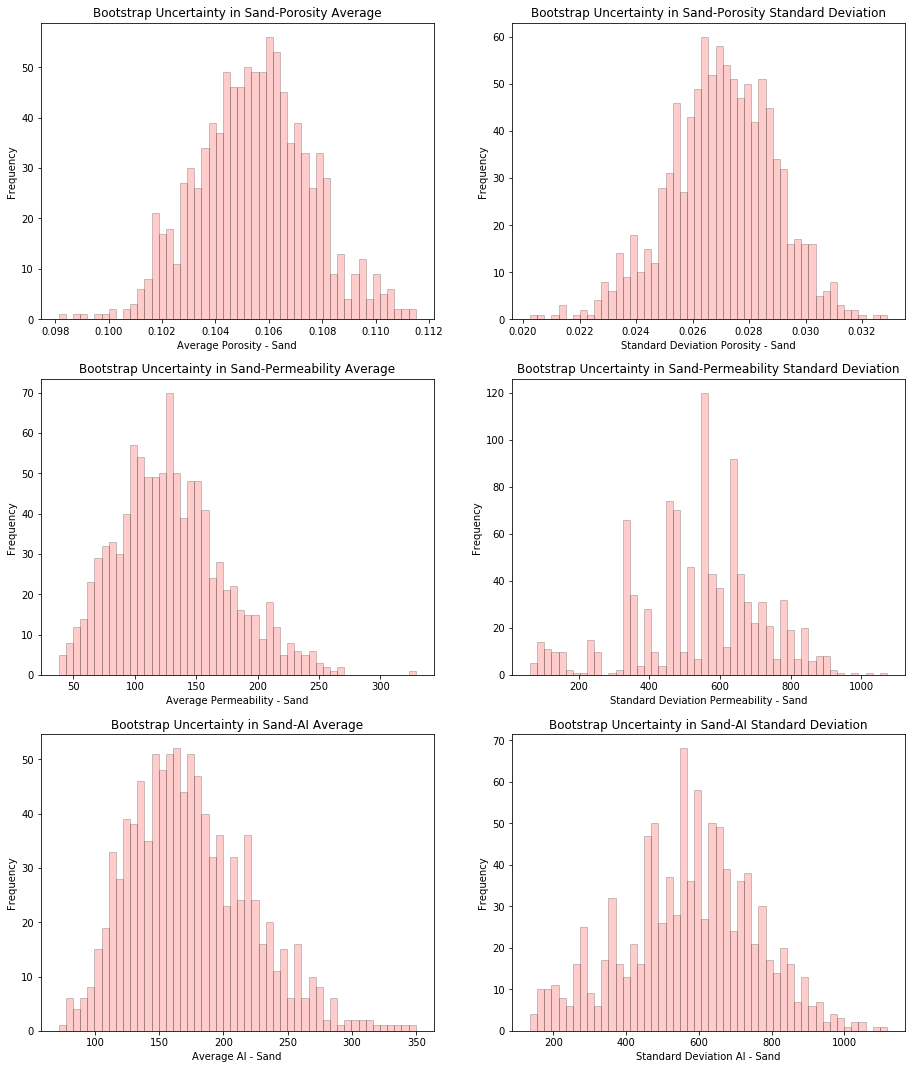

Summary Statistics for Bootstrap Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.09813362697859418, 0.11150490114018276), mean=0.10545826225063036, variance=4.450227902181386e-06, skewness=0.025840127518400903, kurtosis=-0.01594787965708111)
P10 0.103, P50 0.105, P90 0.108

Summary Statistics for Bootstrap Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.020244810201714345, 0.03288200343784113), mean=0.027035592839212114, variance=3.5048634666797744e-06, skewness=-0.2231467624778145, kurtosis=0.20829129326939455)
P10 0.025, P50 0.027, P90 0.029


Summary Statistics for Bootstrap Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(37.91911523544223, 328.955441768931), mean=130.0510325004713, variance=2000.5021421598763, skewness=0.5536632142677164, kurtosis=0.23791448303032015)
P10 74.587, P50 126.326, P90 191.424

Summary Statistics for Bootstrap Permeability Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(61

In [235]:
L = 1000                                 # set the number of realizations
mean_po = np.zeros(L); stdev_po = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_pe = np.zeros(L); stdev_pe = np.zeros(L)
mean_ai = np.zeros(L); stdev_ai = np.zeros(L)
for l in range(0, L):                      # loop over realizations
    samples_po = random.choices(df_sand['Porosity'].values, weights=df_sand['Wts_po'].values, cum_weights=None, k=len(df_sand))
    mean_po[l] = np.average(samples_po)
    stdev_po[l] = np.std(samples_po)
    samples_pe = random.choices(df_sand['Perm'].values, weights=df_sand['Wts_pe'].values, cum_weights=None, k=len(df_sand))
    mean_pe[l] = np.average(samples_pe)
    stdev_pe[l] = np.std(samples_pe)
    samples_ai = random.choices(df_sand['Perm'].values, weights=df_sand['Wts_ai'].values, cum_weights=None, k=len(df_sand))
    mean_ai[l] = np.average(samples_ai)
    stdev_ai[l] = np.std(samples_ai)
    
plt.subplot(321)
GSLIB.hist_st(mean_po,mean_po.min(),mean_po.max(),False,False,50,None,'Average Porosity - Sand','Bootstrap Uncertainty in Sand-Porosity Average')

plt.subplot(322)
GSLIB.hist_st(stdev_po,stdev_po.min(),stdev_po.max(),False,False,50,None,'Standard Deviation Porosity - Sand','Bootstrap Uncertainty in Sand-Porosity Standard Deviation')

plt.subplot(323)
GSLIB.hist_st(mean_pe,mean_pe.min(),mean_pe.max(),False,False,50,None,'Average Permeability - Sand','Bootstrap Uncertainty in Sand-Permeability Average')

plt.subplot(324)
GSLIB.hist_st(stdev_pe,stdev_pe.min(),stdev_pe.max(),False,False,50,None,'Standard Deviation Permeability - Sand','Bootstrap Uncertainty in Sand-Permeability Standard Deviation')

plt.subplot(325)
GSLIB.hist_st(mean_ai,mean_ai.min(),mean_ai.max(),False,False,50,None,'Average AI - Sand','Bootstrap Uncertainty in Sand-AI Average')

plt.subplot(326)
GSLIB.hist_st(stdev_ai,stdev_ai.min(),stdev_ai.max(),False,False,50,None,'Standard Deviation AI - Sand','Bootstrap Uncertainty in Sand-AI Standard Deviation')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.5, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Porosity Mean Realizations:')
print(stats.describe(mean_po))
print('P10 ' + str(round(np.percentile(mean_po,10),3)) + ', P50 ' + str(round(np.percentile(mean_po,50),3)) + ', P90 ' + str(round(np.percentile(mean_po,90),3))) 

print('\nSummary Statistics for Bootstrap Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_po))
print('P10 ' + str(round(np.percentile(stdev_po,10),3)) + ', P50 ' + str(round(np.percentile(stdev_po,50),3)) + ', P90 ' + str(round(np.percentile(stdev_po,90),3)))

print('\n\nSummary Statistics for Bootstrap Permeability Mean Realizations:')
print(stats.describe(mean_pe))
print('P10 ' + str(round(np.percentile(mean_pe,10),3)) + ', P50 ' + str(round(np.percentile(mean_pe,50),3)) + ', P90 ' + str(round(np.percentile(mean_pe,90),3))) 

print('\nSummary Statistics for Bootstrap Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_pe))
print('P10 ' + str(round(np.percentile(stdev_pe,10),3)) + ', P50 ' + str(round(np.percentile(stdev_pe,50),3)) + ', P90 ' + str(round(np.percentile(stdev_pe,90),3)))

print('\n\nSummary Statistics for Bootstrap AI Mean Realizations:')
print(stats.describe(mean_ai))
print('P10 ' + str(round(np.percentile(mean_ai,10),3)) + ', P50 ' + str(round(np.percentile(mean_ai,50),3)) + ', P90 ' + str(round(np.percentile(mean_ai,90),3))) 

print('\nSummary Statistics for Bootstrap AI Standard Deviation Realizations:')
print(stats.describe(stdev_ai))
print('P10 ' + str(round(np.percentile(stdev_ai,10),3)) + ', P50 ' + str(round(np.percentile(stdev_ai,50),3)) + ', P90 ' + str(round(np.percentile(stdev_ai,90),3)))

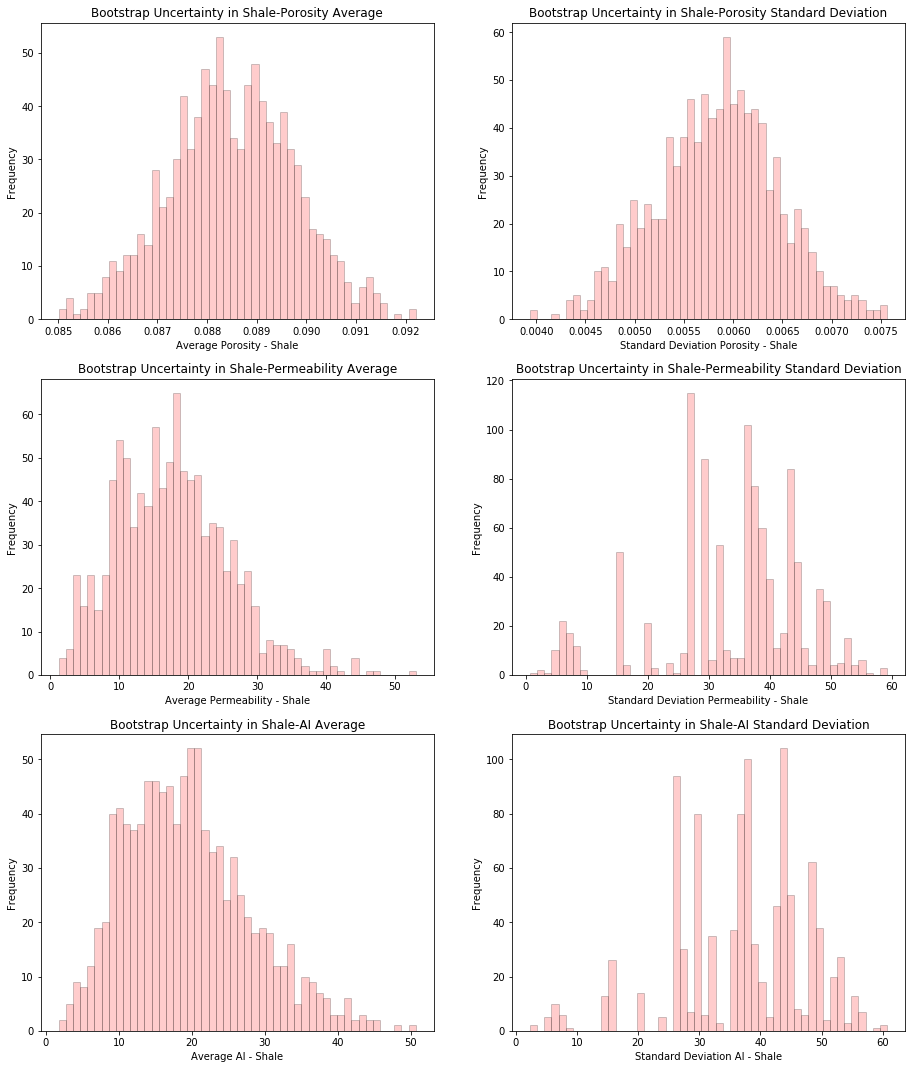

Summary Statistics for Bootstrap Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.08501062747810605, 0.0922036712590286), mean=0.08849052049485343, variance=1.6064294723731192e-06, skewness=-0.01329966887895813, kurtosis=-0.22923175515159366)
P10 0.087, P50 0.088, P90 0.09

Summary Statistics for Bootstrap Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.003936319080085997, 0.007560807790214529), mean=0.005839480253197576, variance=3.765130304790877e-07, skewness=-0.04315744943400949, kurtosis=-0.11037613345219244)
P10 0.005, P50 0.006, P90 0.007


Summary Statistics for Bootstrap Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(1.219902909777811, 53.02381802096522), mean=17.663673474805858, variance=65.18379713575187, skewness=0.5795522824314556, kurtosis=0.545733080633517)
P10 8.084, P50 17.305, P90 27.979

Summary Statistics for Bootstrap Permeability Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.667

In [234]:
L = 1000                                 # set the number of realizations
mean_po = np.zeros(L); stdev_po = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_pe = np.zeros(L); stdev_pe = np.zeros(L)
mean_ai = np.zeros(L); stdev_ai = np.zeros(L)
for l in range(0, L):                      # loop over realizations
    samples_po = random.choices(df_shale['Porosity'].values, weights=df_shale['Wts_po'].values, cum_weights=None, k=len(df_shale))
    mean_po[l] = np.average(samples_po)
    stdev_po[l] = np.std(samples_po)
    samples_pe = random.choices(df_shale['Perm'].values, weights=df_shale['Wts_pe'].values, cum_weights=None, k=len(df_shale))
    mean_pe[l] = np.average(samples_pe)
    stdev_pe[l] = np.std(samples_pe)
    samples_ai = random.choices(df_shale['Perm'].values, weights=df_shale['Wts_ai'].values, cum_weights=None, k=len(df_shale))
    mean_ai[l] = np.average(samples_ai)
    stdev_ai[l] = np.std(samples_ai)
    
plt.subplot(321)
GSLIB.hist_st(mean_po,mean_po.min(),mean_po.max(),False,False,50,None,'Average Porosity - Shale','Bootstrap Uncertainty in Shale-Porosity Average')

plt.subplot(322)
GSLIB.hist_st(stdev_po,stdev_po.min(),stdev_po.max(),False,False,50,None,'Standard Deviation Porosity - Shale','Bootstrap Uncertainty in Shale-Porosity Standard Deviation')

plt.subplot(323)
GSLIB.hist_st(mean_pe,mean_pe.min(),mean_pe.max(),False,False,50,None,'Average Permeability - Shale','Bootstrap Uncertainty in Shale-Permeability Average')

plt.subplot(324)
GSLIB.hist_st(stdev_pe,stdev_pe.min(),stdev_pe.max(),False,False,50,None,'Standard Deviation Permeability - Shale','Bootstrap Uncertainty in Shale-Permeability Standard Deviation')

plt.subplot(325)
GSLIB.hist_st(mean_ai,mean_ai.min(),mean_ai.max(),False,False,50,None,'Average AI - Shale','Bootstrap Uncertainty in Shale-AI Average')

plt.subplot(326)
GSLIB.hist_st(stdev_ai,stdev_ai.min(),stdev_ai.max(),False,False,50,None,'Standard Deviation AI - Shale','Bootstrap Uncertainty in Shale-AI Standard Deviation')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.5, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Porosity Mean Realizations:')
print(stats.describe(mean_po))
print('P10 ' + str(round(np.percentile(mean_po,10),3)) + ', P50 ' + str(round(np.percentile(mean_po,50),3)) + ', P90 ' + str(round(np.percentile(mean_po,90),3))) 

print('\nSummary Statistics for Bootstrap Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_po))
print('P10 ' + str(round(np.percentile(stdev_po,10),3)) + ', P50 ' + str(round(np.percentile(stdev_po,50),3)) + ', P90 ' + str(round(np.percentile(stdev_po,90),3)))

print('\n\nSummary Statistics for Bootstrap Permeability Mean Realizations:')
print(stats.describe(mean_pe))
print('P10 ' + str(round(np.percentile(mean_pe,10),3)) + ', P50 ' + str(round(np.percentile(mean_pe,50),3)) + ', P90 ' + str(round(np.percentile(mean_pe,90),3))) 

print('\nSummary Statistics for Bootstrap Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_pe))
print('P10 ' + str(round(np.percentile(stdev_pe,10),3)) + ', P50 ' + str(round(np.percentile(stdev_pe,50),3)) + ', P90 ' + str(round(np.percentile(stdev_pe,90),3)))

print('\n\nSummary Statistics for Bootstrap AI Mean Realizations:')
print(stats.describe(mean_ai))
print('P10 ' + str(round(np.percentile(mean_ai,10),3)) + ', P50 ' + str(round(np.percentile(mean_ai,50),3)) + ', P90 ' + str(round(np.percentile(mean_ai,90),3))) 

print('\nSummary Statistics for Bootstrap AI Standard Deviation Realizations:')
print(stats.describe(stdev_ai))
print('P10 ' + str(round(np.percentile(stdev_ai,10),3)) + ', P50 ' + str(round(np.percentile(stdev_ai,50),3)) + ', P90 ' + str(round(np.percentile(stdev_ai,90),3)))

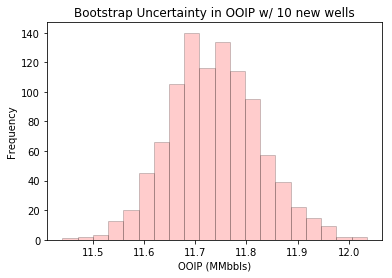

In [233]:
L=1000
mean_po_sa = np.zeros(L);
mean_po_sh = np.zeros(L);
mean_fa = np.zeros(L);
OOIP = np.zeros(L)

for l in range(0, L):                      # loop over realizations
    samples = random.choices(df_sand['Porosity'].values, weights=df_sand['Wts_po'].values, cum_weights=None, k=L)
    mean_po_sa[l] = np.average(samples)
    samples = random.choices(df_shale['Porosity'].values, weights=df_shale['Wts_po'].values, cum_weights=None, k=L)
    mean_po_sh[l] = np.average(samples)
    samples = random.choices(df_subset['Facies'].values, weights=df_subset['Wts_fa'].values, cum_weights=None, k=L)
    mean_fa[l] = np.average(samples)

Sw=0.9; h=20; # in meter
Area=1E6; # in (meter)^2
OOIP=6.2898*Sw*h*Area*(mean_po_sa*mean_fa+mean_po_sh*(1-mean_fa))

OOIP=OOIP/1E6 # in MMbbls

plt.plot 
GSLIB.hist_st(OOIP,OOIP.min(),OOIP.max(),False,False,20,None,'OOIP (MMbbls)','Bootstrap Uncertainty in OOIP w/ 10 new wells')
plt.show()   